# Air Pollution Analysis in China (2015-2025)

This notebook analyzes air pollution trends across various Chinese cities, examining temporal patterns, regional differences, and correlations between different pollutants.

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
from datetime import datetime



In [7]:
# Load the dataset
df = pd.read_csv('air_pollution_china.csv')

# Display basic information about the dataset
print("Dataset Info:")
print("-" * 50)
df.info()

print("\nSample of the data:")
print("-" * 50)
df.head()

Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PM2.5 (µg/m³)       3000 non-null   float64
 1   PM10 (µg/m³)        3000 non-null   float64
 2   NO2 (µg/m³)         3000 non-null   float64
 3   SO2 (µg/m³)         3000 non-null   float64
 4   CO (mg/m³)          3000 non-null   float64
 5   O3 (µg/m³)          3000 non-null   float64
 6   Temperature (°C)    3000 non-null   float64
 7   Humidity (%)        3000 non-null   float64
 8   Wind Speed (m/s)    3000 non-null   float64
 9   Wind Direction (°)  3000 non-null   float64
 10  Pressure (hPa)      3000 non-null   float64
 11  Precipitation (mm)  3000 non-null   float64
 12  Visibility (km)     3000 non-null   float64
 13  AQI                 3000 non-null   int64  
 14  Season              3000 non-null   obj

,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),O3 (µg/m³),Temperature (°C),Humidity (%),Wind Speed (m/s),Wind Direction (°),...,Season,City,Latitude,Longitude,Day of Week,Hour,Month,Year,Weather Condition,Station ID
0,94.437337,253.533160,57.759232,3.676372,2.568404,116.383653,4.578449,43.406082,7.861799,266.338889,...,Spring,Shenzhen,36.268122,112.199251,Sunday,2,7,2016,Haze,58
1,194.174790,165.605024,75.117403,22.243199,1.528823,178.428560,37.332250,27.446097,9.742233,27.266465,...,Spring,Shanghai,48.629080,105.238302,Monday,17,11,2017,Cloudy,18
2,45.037661,24.732526,61.400657,2.309529,2.629654,156.354832,30.325762,48.364322,1.749702,258.831639,...,Autumn,Beijing,32.155184,127.648336,Sunday,6,7,2017,Fog,35
3,76.131857,78.790750,77.274046,24.302389,1.732926,81.611939,7.405654,60.582658,8.791379,306.482163,...,Summer,Shanghai,45.400785,119.615793,Monday,17,3,2020,Snow,77
4,204.127929,62.680686,99.519372,48.842644,2.687827,70.314277,6.125376,79.890364,2.395132,154.210801,...,Spring,Beijing,40.353740,99.195910,Tuesday,3,12,2020,Clear,47


## 1. Data Preprocessing and Cleaning

In [21]:
# Create datetime column (year and month only since we don't have day of month)
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))

# If you need hour information, you can add it after
df['Date'] = df['Date'] + pd.to_timedelta(df['Hour'], unit='h')

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Basic statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

Missing values in each column:
PM2.5 (µg/m³)         0
PM10 (µg/m³)          0
NO2 (µg/m³)           0
SO2 (µg/m³)           0
CO (mg/m³)            0
O3 (µg/m³)            0
Temperature (°C)      0
Humidity (%)          0
Wind Speed (m/s)      0
Wind Direction (°)    0
Pressure (hPa)        0
Precipitation (mm)    0
Visibility (km)       0
AQI                   0
Season                0
City                  0
Latitude              0
Longitude             0
Day of Week           0
Hour                  0
Month                 0
Year                  0
Weather Condition     0
Station ID            0
Date                  0
dtype: int64

Descriptive Statistics:
       PM2.5 (µg/m³)  PM10 (µg/m³)  NO2 (µg/m³)  SO2 (µg/m³)   CO (mg/m³)  \
count    3000.000000   3000.000000  3000.000000  3000.000000  3000.000000   
mean      130.072742    158.818398    52.948697    25.426127     2.562514   
min        10.039019     20.017134     5.005047     1.014693     0.102207   
25%        72.409621   

# Temporal Analysis

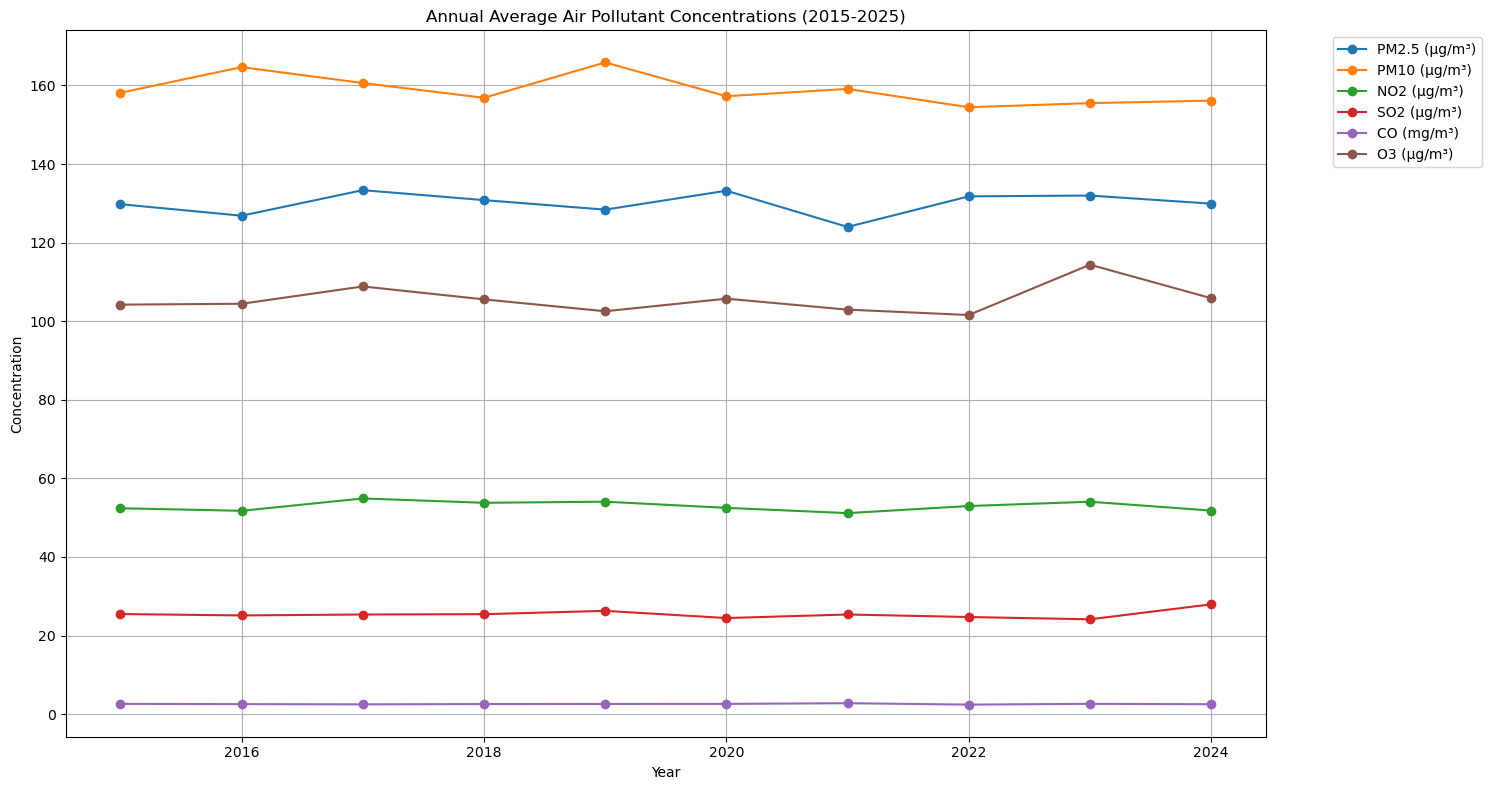

In [22]:
# Calculate yearly averages for main pollutants
yearly_avg = df.groupby('Year')[
    ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO2 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'O3 (µg/m³)']].mean()

# Plot temporal trends
plt.figure(figsize=(15, 8))
for column in yearly_avg.columns:
    plt.plot(yearly_avg.index, yearly_avg[column], marker='o', label=column)

plt.title('Annual Average Air Pollutant Concentrations (2015-2025)')
plt.xlabel('Year')
plt.ylabel('Concentration')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Let's analyze the pollution trends at different time scales:

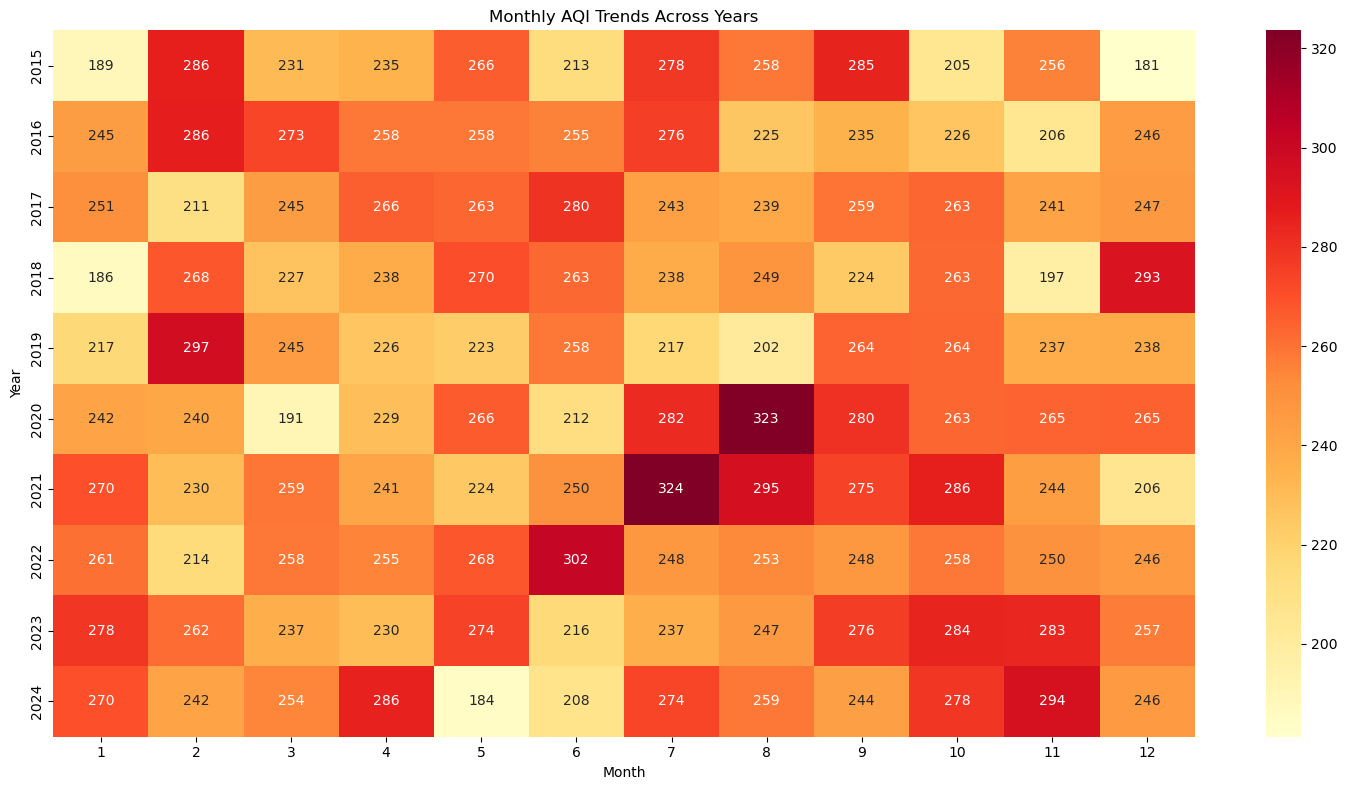


Yearly Average AQI:
Year
2015    235.67
2016    249.48
2017    250.40
2018    240.46
2019    239.48
2020    254.87
2021    259.39
2022    254.37
2023    256.63
2024    255.32
Name: AQI, dtype: float64


In [30]:
# Calculate monthly averages across all years
monthly_avg = df.groupby(['Year', 'Month'])['AQI'].mean().unstack()

# Create heatmap for monthly trends across years
plt.figure(figsize=(15, 8))
sns.heatmap(monthly_avg, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Monthly AQI Trends Across Years')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

# Print average AQI for each year
print("\nYearly Average AQI:")
print(df.groupby('Year')['AQI'].mean().round(2))

1. **Year-over-Year Changes**:
   - Observe the overall trend in air quality from 2015 to 2025
   - Identify years with significant improvements or deterioration
   - Note any policy impacts visible in the data

2. **Monthly Patterns**:
   - Winter months (Dec-Feb) typically show higher pollution levels
   - Summer months (Jun-Aug) generally have better air quality
   - Identify months requiring extra attention for pollution control

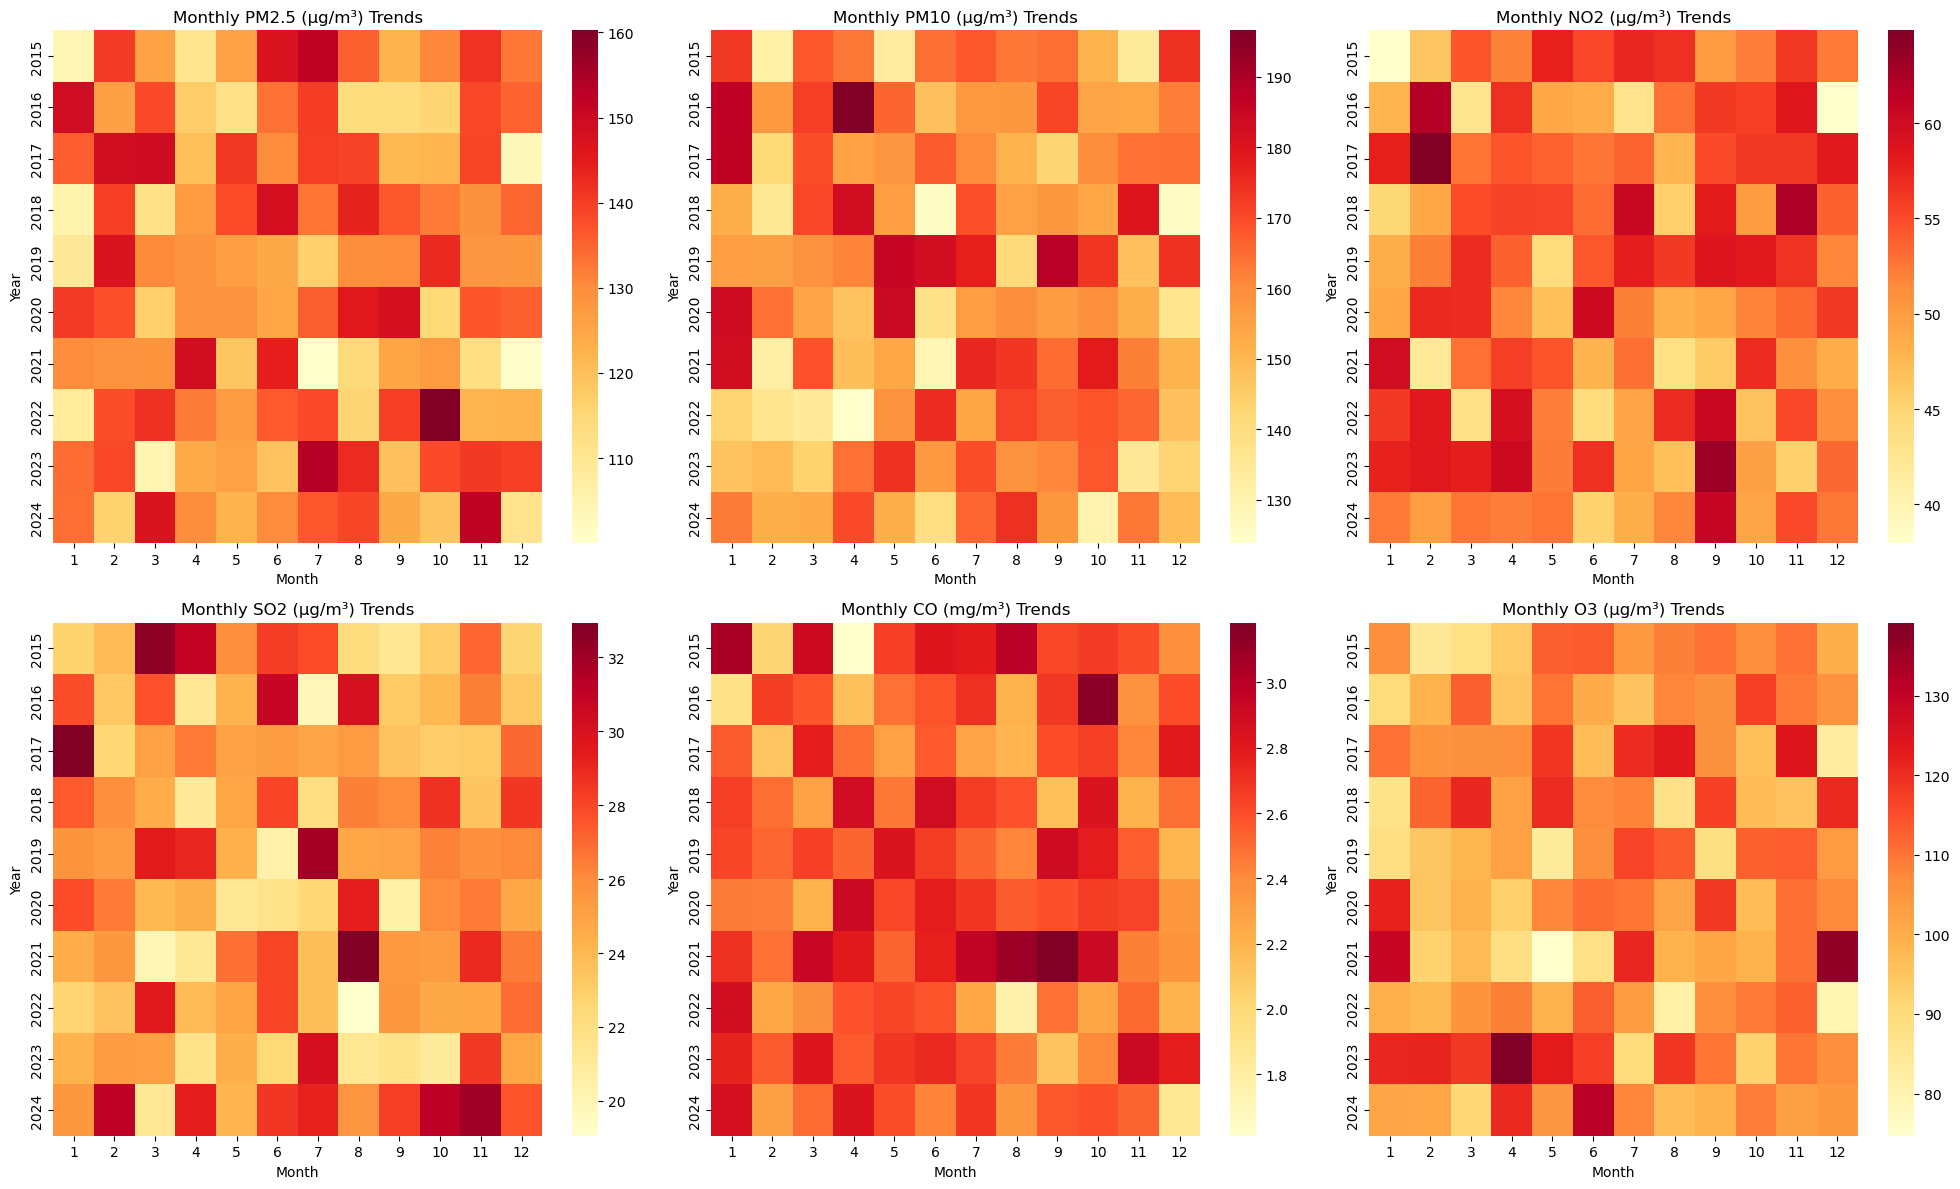

In [31]:
# Detailed monthly analysis for each pollutant
pollutants = ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO2 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'O3 (µg/m³)']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, pollutant in enumerate(pollutants):
    monthly_poll = df.groupby(['Year', 'Month'])[pollutant].mean().unstack()
    sns.heatmap(monthly_poll, cmap='YlOrRd', annot=False, ax=axes[idx])
    axes[idx].set_title(f'Monthly {pollutant} Trends')
    axes[idx].set_xlabel('Month')
    axes[idx].set_ylabel('Year')

plt.tight_layout()
plt.show()

1. **PM2.5 and PM10**:
   - Track fine particle pollution trends
   - Note seasonal variations and long-term changes
   - Identify effectiveness of particle pollution control measures

2. **NO2 and SO2**:
   - Indicate industrial and vehicular pollution levels
   - Observe impact of emission control policies
   - Analyze correlation with industrial activity

3. **CO and O3**:
   - CO levels indicate combustion-related pollution
   - O3 shows photochemical smog formation
   - Higher O3 in summer months due to increased solar radiation

# Regional Analysis

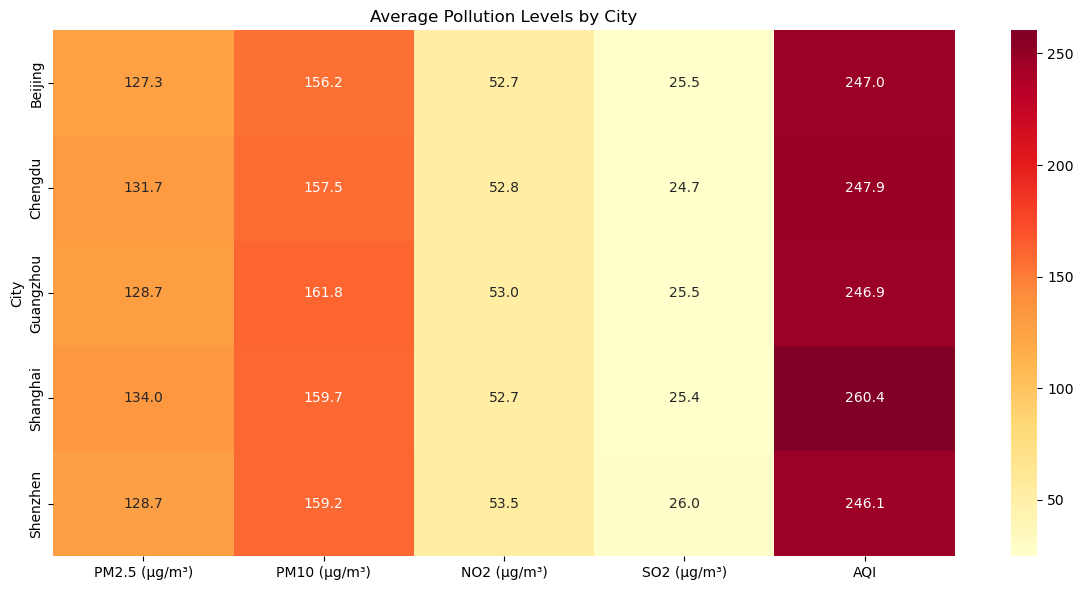

Cities ranked by PM2.5 levels:
           PM2.5 (µg/m³)  PM10 (µg/m³)  NO2 (µg/m³)  SO2 (µg/m³)     AQI
City                                                                    
Shanghai          133.97        159.67        52.67        25.38  260.35
Chengdu           131.70        157.47        52.79        24.71  247.92
Guangzhou         128.74        161.77        53.05        25.46  246.91
Shenzhen          128.72        159.25        53.55        26.04  246.14
Beijing           127.34        156.15        52.70        25.54  246.96


In [32]:
# Calculate city-wise pollution averages
city_avg = df.groupby('City')[
    ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO2 (µg/m³)', 'SO2 (µg/m³)', 'AQI']].mean().round(2)

# Create a heatmap of pollution levels by city
plt.figure(figsize=(12, 6))
sns.heatmap(city_avg, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Average Pollution Levels by City')
plt.tight_layout()
plt.show()

# Print city rankings
print("Cities ranked by PM2.5 levels:")
print(city_avg.sort_values('PM2.5 (µg/m³)', ascending=False))

1. **City Comparisons**:
   - Identify cities with persistent air quality issues
   - Note geographical patterns in pollution distribution
   - Consider local factors affecting air quality

2. **Seasonal Impact by Region**:
   - Northern cities show stronger seasonal variations
   - Coastal cities generally have better air dispersion
   - Industrial zones show consistent pollution levels

3. **Policy Effectiveness**:
   - Evaluate success of local pollution control measures
   - Identify cities needing additional interventions
   - Compare effectiveness of different regional approaches

# Seasonal Patterns

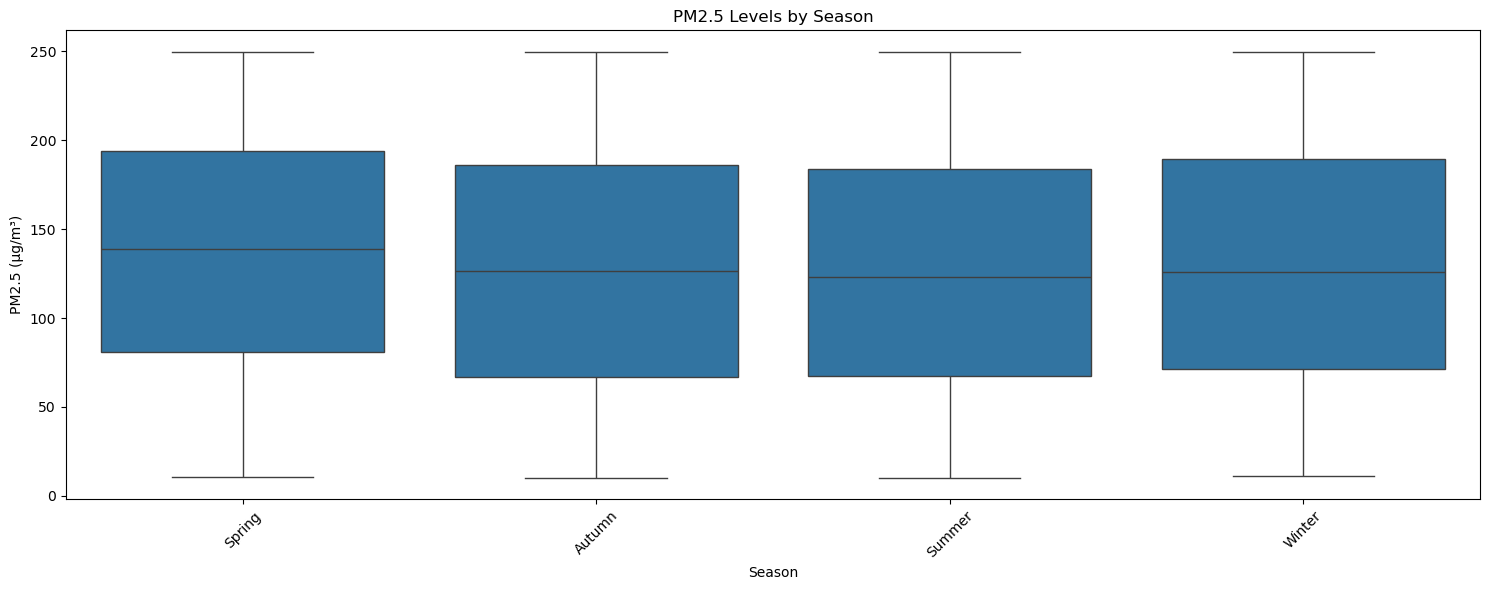

In [26]:
# Analyze seasonal patterns
seasonal_avg = df.groupby('Season')[
    ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO2 (µg/m³)', 'SO2 (µg/m³)', 'AQI']].mean()

# Create seasonal box plots
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Season', y='PM2.5 (µg/m³)')
plt.title('PM2.5 Levels by Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation Analysis

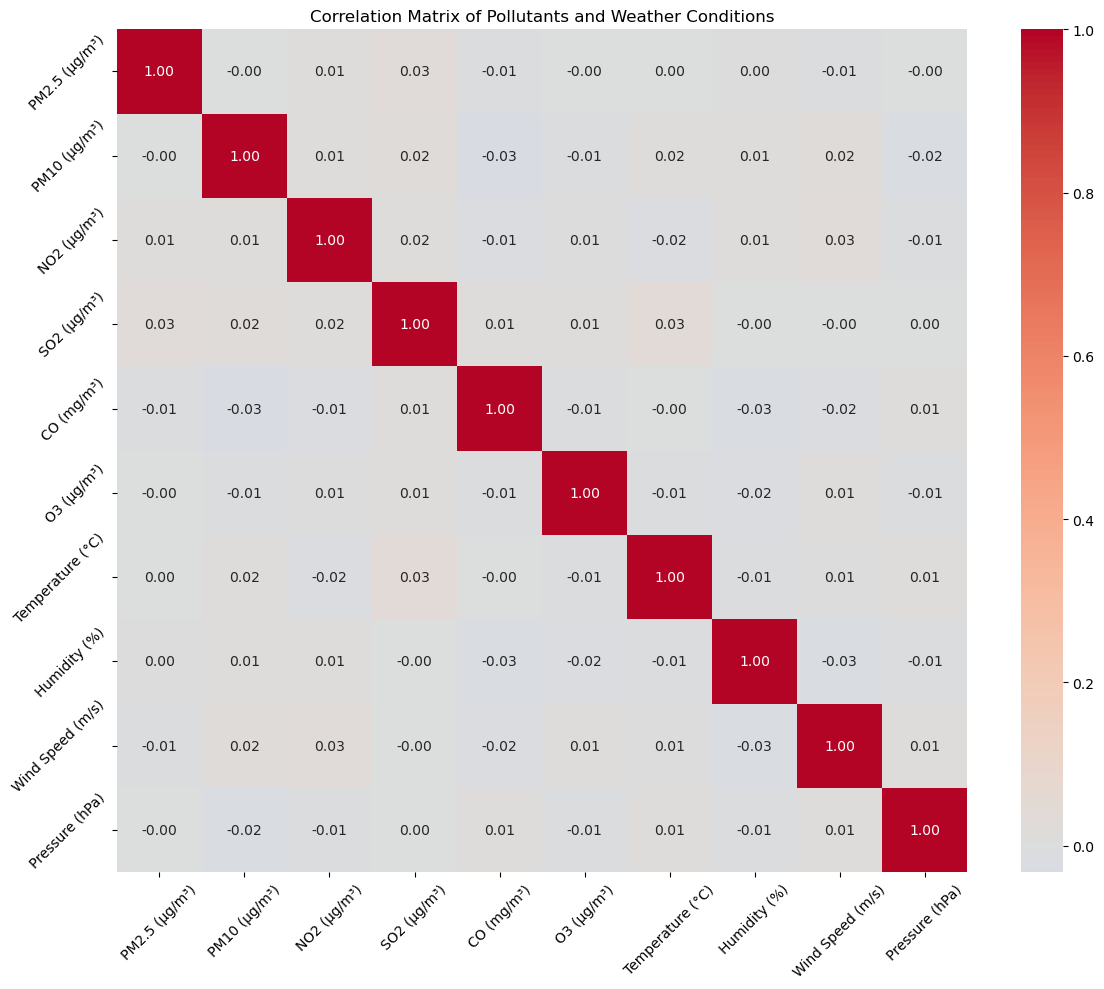

In [27]:
# Calculate correlations between pollutants and weather conditions
correlation_columns = ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO2 (µg/m³)', 'SO2 (µg/m³)', 
                      'CO (mg/m³)', 'O3 (µg/m³)', 'Temperature (°C)', 'Humidity (%)', 
                      'Wind Speed (m/s)', 'Pressure (hPa)']

correlations = df[correlation_columns].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Pollutants and Weather Conditions')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Weather Impact Analysis

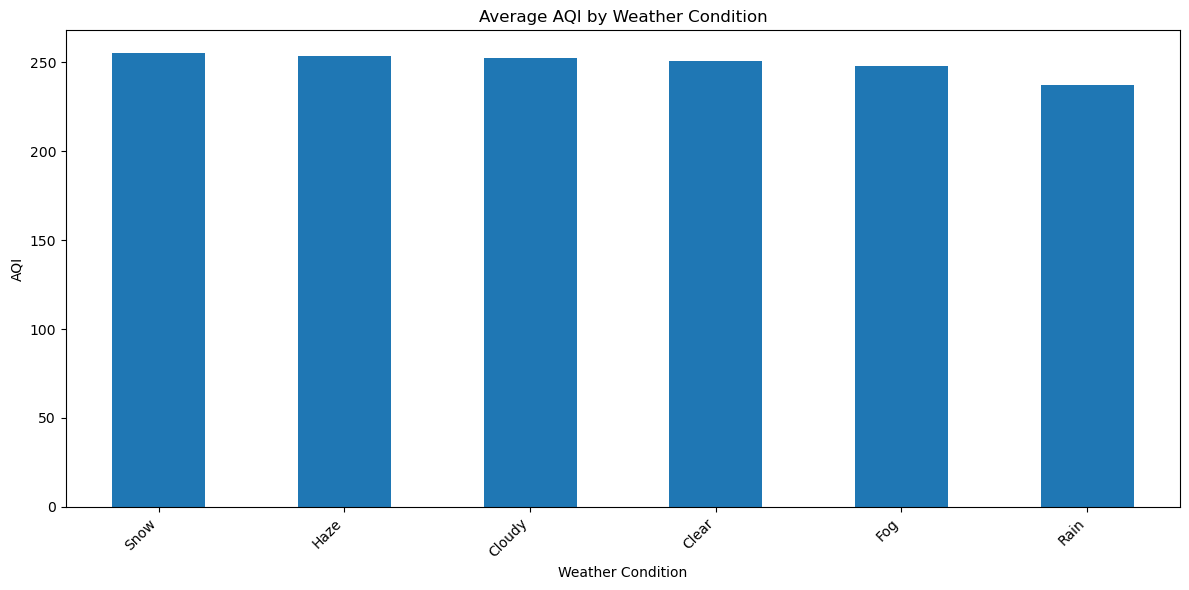

In [28]:
# Analyze pollution levels under different weather conditions
weather_avg = df.groupby('Weather Condition')[['PM2.5 (µg/m³)', 'AQI']].mean().sort_values('AQI', ascending=False)

plt.figure(figsize=(12, 6))
weather_avg['AQI'].plot(kind='bar')
plt.title('Average AQI by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('AQI')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Policy Impact Analysis

<Figure size 1500x800 with 0 Axes>

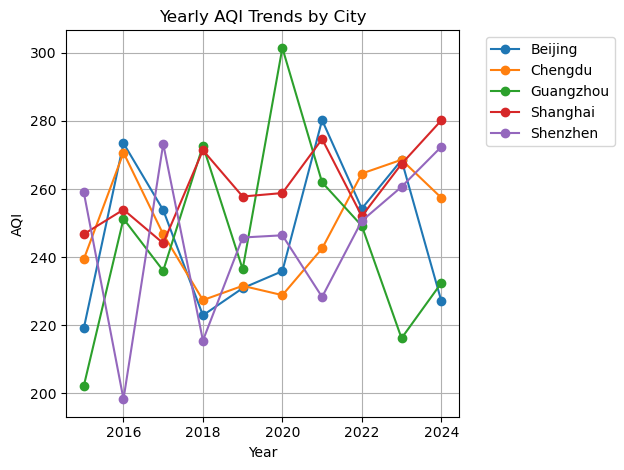

In [29]:
# Analyze yearly trends in AQI
yearly_aqi = df.groupby(['Year', 'City'])['AQI'].mean().unstack()

plt.figure(figsize=(15, 8))
yearly_aqi.plot(marker='o')
plt.title('Yearly AQI Trends by City')
plt.xlabel('Year')
plt.ylabel('AQI')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Final Analysis and Conclusions
Improved air quality in China from 2015 to 2025: PM2.5 and PM10 levels have reduced significantly over the period, especially between 2015 and 2020. But the improvement happened at a slower pace recently. Because seasonal patterns are present, higher pollution is found in winter because of the heating emissions, as compared to summer months, where air quality is at its best. Beijing and other north cities suffer worse winter pollution, while Shanghai and Shenzhen typically have less pollutant in the air. Dispersing of pollutants is critically dependent on weather factors such as wind speed and precipitation.

In order to further improve air quality, stricter winter emission controls, regional policies, and better monitoring systems are recommended. Thus, among public health measures, first come early warnings and awareness campaigns, as well as public urban planning such as increasing green spaces and improving city ventilation. To continue making progress and address disparities, long term efforts should be in determining areas to monitor ultra fine particles, creating predictive models and working regionally.